In [183]:
import pandas as pd
import numpy as np
import os

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, ShuffleSplit, LeavePOut, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics, model_selection

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
os.listdir()

['.ipynb_checkpoints',
 'gender-prediction.csv',
 'ids-a1',
 'ids.a2',
 'lectures',
 'sp20-bcs-023-assignment4.docx',
 'sp20-bcs-023-assignment4.ipynb',
 'Untitled.ipynb',
 '~$20-bcs-023-assignment4.docx']

## LOADING DATASET

In [45]:
df = pd.read_csv("gender-prediction.csv")
df.tail()

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male
79,62,142,yes,long,37,no,blue,female


## ENCODING (STRINGS INTO NUMBERS)

In [46]:
#converting strings into numbers
labels = preprocessing.LabelEncoder()
b_encoded = labels.fit_transform(df.beard)
h_encoded = labels.fit_transform(df.hair_length)
s_encoded = labels.fit_transform(df.scarf)
e_encoded = labels.fit_transform(df.eye_color)
g_encoded = labels.fit_transform(df.gender)

b_encoded

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [47]:
h_encoded

array([3, 0, 2, 1, 2, 3, 0, 3, 3, 2, 1, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 0,
       1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 3, 3, 2, 1])

In [48]:
s_encoded

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [49]:
e_encoded

array([0, 0, 1, 3, 3, 0, 2, 2, 4, 3, 3, 3, 0, 3, 0, 1, 0, 4, 3, 4, 0, 0,
       0, 3, 2, 2, 0, 4, 1, 3, 2, 3, 3, 0, 2, 2, 4, 0, 3, 4, 3, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 4, 3, 0,
       4, 0, 0, 0, 2, 0, 2, 3, 4, 4, 2, 0, 3, 1])

In [50]:
g_encoded

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

## Seperating INPUT and OUTPUT columns

In [51]:
inputfeatures = list(zip(df.height,df.weight,b_encoded,h_encoded,df.shoe_size,s_encoded,e_encoded))
target = g_encoded

In [33]:
target

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

## QUESTION:2

### TRAIN_TEST_SPLIT

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(inputfeatures, target, test_size = 0.33, random_state = 1)

### RANDOM FOREST CLASSIFIER

In [54]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [55]:
prediction = model.predict(X_test)
accuracy_RFC = accuracy_score(Y_test, prediction)*100
print("accuracy score of Random Forest Classifier:", accuracy_RFC, '%')

accuracy score of Random Forest Classifier: 100.0 %


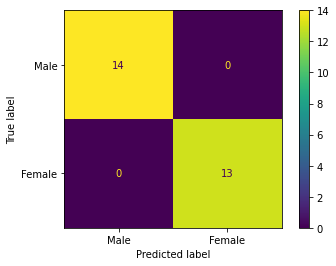

In [58]:
confusion_matrix = metrics.confusion_matrix(Y_test,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [59]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



### SUPPORT VECTOR MACHINE

In [61]:
model1 = SVC()
model1.fit(X_train,Y_train)

SVC()

In [62]:
predict = model1.predict(X_test)
accuracy_SVC = accuracy_score(Y_test, predict)*100
print("accuracy score of Support Vector Machine:", accuracy_SVC, '%')

accuracy score of Support Vector Machine: 77.77777777777779 %


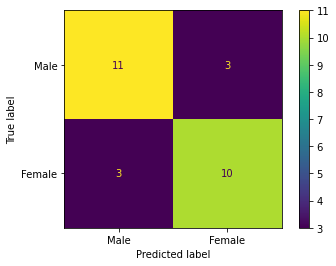

In [63]:
confusion_matrix = metrics.confusion_matrix(Y_test,predict)

sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
sm_display.plot()
plt.show()

In [64]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.77      0.77      0.77        13

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27



### MULTILAYER PERCEPTRON

In [65]:
model2 = MLPClassifier()
model2.fit(X_train,Y_train)

MLPClassifier()

In [66]:
pred = model2.predict(X_test)
accuracy_MLP = accuracy_score(Y_test, pred)*100
print("accuracy score of Multilayer Perceptron:", accuracy_MLP, '%')

accuracy score of Multilayer Perceptron: 48.148148148148145 %


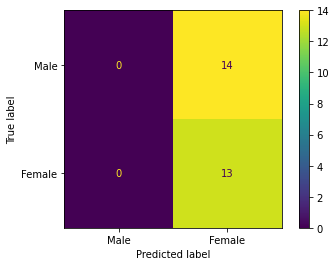

In [67]:
confusion_matrix = metrics.confusion_matrix(Y_test,pred)

m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
m_display.plot()
plt.show()

In [68]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.48      1.00      0.65        13

    accuracy                           0.48        27
   macro avg       0.24      0.50      0.33        27
weighted avg       0.23      0.48      0.31        27



C:\Users\minahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\minahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\minahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### QUESTION:2 (PART 2)

#### TRAIN TEST SPLIT (80:20 RATIO)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(inputfeatures, target, test_size = 0.2, random_state = 1)

#### RANDOM FOREST CLASSIFIER

In [73]:
mod = RandomForestClassifier()
mod.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
prediction = mod.predict(x_test)
accuracy_rfc = accuracy_score(y_test, prediction)*100
print("accuracy score of Random Forest Classifier:", accuracy_rfc, '%')

accuracy score of Random Forest Classifier: 100.0 %


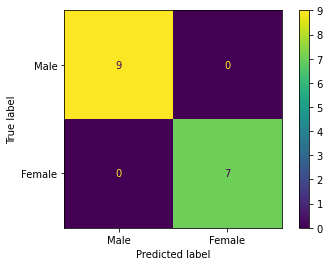

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
cm_display.plot()
plt.show()

In [76]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### SUPPORT VECTOR MACHINE

In [77]:
mod1 = SVC()
mod1.fit(x_train,y_train)

SVC()

In [78]:
predict = mod1.predict(x_test)
accuracy_svc = accuracy_score(y_test, predict)*100
print("accuracy score of Support Vector Machine:", accuracy_svc, '%')

accuracy score of Support Vector Machine: 87.5 %


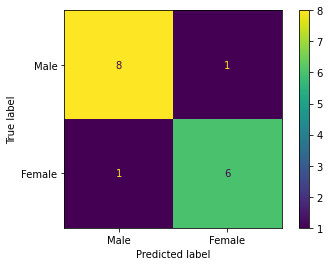

In [79]:
confusion_matrix = metrics.confusion_matrix(y_test,predict)

sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
sm_display.plot()
plt.show()

In [80]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.86      0.86      0.86         7

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



#### MULTLAYER PERCEPTRON

In [81]:
mod2 = MLPClassifier()
mod2.fit(x_train,y_train)

C:\Users\minahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [82]:
pred = mod2.predict(x_test)
accuracy_mlp = accuracy_score(y_test, pred)*100
print("accuracy score of Multilayer Perceptron:", accuracy_mlp, '%')

accuracy score of Multilayer Perceptron: 93.75 %


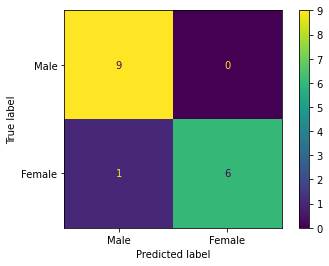

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test,pred)

m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
m_display.plot()
plt.show()

In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.86      0.92         7

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.94        16
weighted avg       0.94      0.94      0.94        16



### QUESTION:2 (PART 4)

#### Removing beard and scarf attributes

In [117]:
x = list(zip(df.height,df.weight,h_encoded,df.shoe_size,e_encoded))
y = g_encoded

#### train test split

In [118]:
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size = 0.2, random_state = 1)

#### RANDOM FOREST CLASSIFIER

In [119]:
m = RandomForestClassifier()
m.fit(x_tr,y_tr)

RandomForestClassifier()

In [120]:
prediction = m.predict(x_t)
accuracy_rfc = accuracy_score(y_t, prediction)*100
print("accuracy score of Random Forest Classifier:", accuracy_rfc, '%')

accuracy score of Random Forest Classifier: 100.0 %


#### SUPPORT VECTOR MACHINE

In [121]:
m1 = SVC()
m1.fit(x_tr,y_tr)

SVC()

In [122]:
predict = m1.predict(x_t)
accuracy_svc = accuracy_score(y_t, predict)*100
print("accuracy score of Support Vector Machine:", accuracy_svc, '%')

accuracy score of Support Vector Machine: 87.5 %


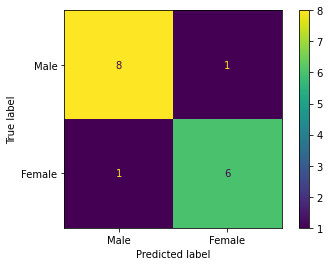

In [123]:
confusion_matrix = metrics.confusion_matrix(y_t,predict)

m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
m_display.plot()
plt.show()

#### MULTILAYER PERCEPTRON

In [124]:
m2 = MLPClassifier()
m2.fit(x_tr,y_tr)

MLPClassifier()

In [125]:
pred = m2.predict(x_t)
accuracy_mlp = accuracy_score(y_t, pred)*100
print("accuracy score of Multilayer Perceptron:", accuracy_mlp, '%')

accuracy score of Multilayer Perceptron: 43.75 %


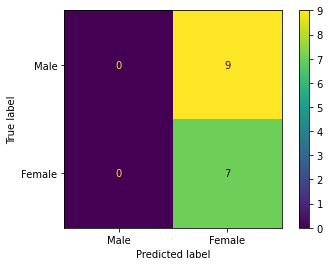

In [126]:
confusion_matrix = metrics.confusion_matrix(y_t,pred)

c_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
c_display.plot()
plt.show()

## QUESTION:3

### Monte Carlo cross-validation

In [192]:
X = list(zip(df.height,df.weight,b_encoded,h_encoded,df.shoe_size,s_encoded,e_encoded))
Y= g_encoded

In [193]:
mc_split = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 1)

In [194]:
DTC = DecisionTreeClassifier()

In [195]:
split = cross_val_score(DTC, X, Y, scoring="f1", cv=mc_split)

In [197]:
split

array([1.        , 1.        , 1.        , 0.95238095, 0.94117647])

In [198]:
accuracy = split.mean()*100
print("F1 score of Decision tree with monte carlo cross validation:", accuracy, '%')

F1 score of Decision tree with monte carlo cross validation: 97.87114845938376 %


### Leave P-Out cross validation

In [199]:
tc_split = LeavePOut(p=3)
tc_split.get_n_splits(X)

82160

In [ ]:
score = cross_val_score(DTC, X,Y, scoring="f1", cv=tc_split)

In [201]:
score

array([1.        , 1.        , 1.        , ..., 0.66666667, 0.66666667,
       0.8       ])

In [203]:
acc = score.mean()*100
print("f1 score of Decision tree with POut cross validation:", acc, '%')

f1 score of Decision tree with POut cross validation: 87.3635994806881 %


## QUESTION:4

#### Adding more 5 instances and loading data again

In [153]:
data = pd.read_csv("gender-prediction.csv")
data.tail()

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
80,70,127,no,medium,40,yes,black,female
81,73,133,yes,medium,39,no,blue,male
82,65,129,no,short,37,no,brown,male
83,69,141,no,long,40,no,blue,female
84,70,138,yes,short,38,no,black,male


#### ENCODING

In [154]:
#converting strings into numbers
labels = preprocessing.LabelEncoder()
beard_encoded = labels.fit_transform(data.beard)
hair_encoded = labels.fit_transform(data.hair_length)
scarf_encoded = labels.fit_transform(data.scarf)
eye_encoded = labels.fit_transform(data.eye_color)
gender_encoded = labels.fit_transform(data.gender)

In [172]:
gender_encoded

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

#### SEPERATING INPUT OUTPUT

In [155]:
X_feature = list(zip(data.height,data.weight,beard_encoded,hair_encoded,data.shoe_size,scarf_encoded,eye_encoded))
Y_target = gender_encoded

### Gussain Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
model = GaussianNB()
model.fit(X_feature,Y_target)

GaussianNB()

#### Adding new test instances

In [179]:
height = [70, 69, 72, 65, 68, 69, 72, 73, 69, 71]
weight = [130, 129, 142, 125, 148, 133, 122, 166, 144, 139]
beard = [1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
hair_length = [2, 1, 3, 3, 1, 2, 2, 3, 2, 1]
shoe_size = [39, 39, 40, 37, 38, 39, 37, 40, 41, 37]
scarf = [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
eye_color = [2, 0, 3, 1, 2, 0, 0, 2, 4, 0]
gender = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]

In [180]:
x = list(zip(height,weight,beard,hair_length,shoe_size,scarf,eye_color))
y = gender
x

[(70, 130, 1, 2, 39, 0, 2),
 (69, 129, 0, 1, 39, 1, 0),
 (72, 142, 0, 3, 40, 0, 3),
 (65, 125, 1, 3, 37, 0, 1),
 (68, 148, 0, 1, 38, 1, 2),
 (69, 133, 1, 2, 39, 0, 0),
 (72, 122, 0, 2, 37, 0, 0),
 (73, 166, 1, 3, 40, 0, 2),
 (69, 144, 1, 2, 41, 0, 4),
 (71, 139, 0, 1, 37, 1, 0)]

In [191]:
y

[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]

In [181]:
predict = model.predict(x)

In [182]:
accuracy = accuracy_score(y, predict)*100
print("accuracy score of Gussian Naive bayes:", accuracy, '%')

accuracy score of Gussian Naive bayes: 90.0 %


In [189]:
precision = precision_score(y, predict)*100
print("precision score of Gussian Naive bayes:", precision, '%')

precision score of Gussian Naive bayes: 85.71428571428571 %


In [190]:
recall = recall_score(y, predict)*100
print("recall score of Gussian Naive bayes:", recall, '%')

recall score of Gussian Naive bayes: 100.0 %


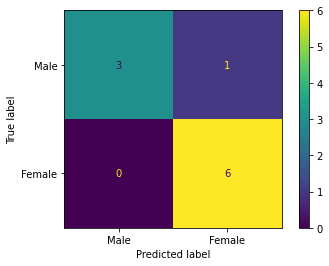

In [187]:
confusion_matrix = metrics.confusion_matrix(y,predict)

c_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])
c_display.plot()
plt.show()

In [188]:
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## TEST any INSTANCE using GAUSSIAN NAIVE BAYES

In [160]:
Height = input('Enter Height:')
Weight = input('Enter Weight:')
Beard = input('Enter Beard(0/1):')
Hair_length = input('Enter hair length(small(3)/long(1)/medium(2)/bald(0):')
Shoe_size = input('Enter shoe size:')
Scarf = input('wear scarf (yes:1/no:0):')
Eye_Color = input('Enter your eye color(black:0/blue:1/gray:3/brown:2/green:4):')
ans = model.predict([[Height, Weight, Beard, Hair_length, Shoe_size, Scarf, Eye_Color]])
if(ans == 1):
    print("model Prdeict this data set as: Male")
else:
    print("model Prdeict this data set as: Female")


Enter Height:70
Enter Weight:130
Enter Beard(0/1):0
Enter hair length(small(3)/long(1)/medium(2)/bald(0):3
Enter shoe size:40
wear scarf (yes:1/no:0):1
Enter your eye color(black:0/blue:1/gray:3/brown:2/green:4):1
model Prdeict this data set as: Female


C:\Users\minahil\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
